# Project: Investigate a Dataset of Titanic

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset describes the basic information of passengers in Titanic including names, gender, families on board with them, ticket fare etc. 
<br>
This project will focus on the passengers' survival chances and try to explore some other factors which may increase the passengers' survival, such as Sex, Age and Fare of tickets. 

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
from scipy.stats.distributions import norm

set up import statements for all of the packages that I will use for this project

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 

### General Properties

In [7]:
filename = 'titanic-data.csv'
titanic_data = pd.read_csv(filename)

Read csv file and load it to a DataFrame in 'titanic_data'. Then we will take a look into the data and get it ready to analysis.

In [8]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


This dataframe has 12 columns and the first 10 rows has been printed out. 

Since we set our purpose of this project to examine the survial chance for passengers and the effect of Age, Sex and Fare of tickets on passengers' survival, we have to look into the columns 'Survived', 'Age', 'Sex' and 'Fare' very carefully. 

In [9]:
len(titanic_data)

891

This dataframe has 891 rows which indicates the passenger number is 891 in the record.

In [10]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The data type of each column is examined. 'Age' and 'Fare' columns are float64. 'Name', 'Sex', 'Ticket', 'Cabin', 'Embraked' columns are strings. All the other columns are int64.

In [11]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Overall information, such as count, mean, std, min, max and so on, is checked for all the numerical columns. 
<br>
It seems all the data are normal except that 'Age' column count is only 714 instead of 891. We need to check that further.

In [12]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The value of NaN is also checked for each column. It shows that there are 177, 687 and 2 NaNs in column 'Age','Cabin' and 'Embarked' respectively.
<br>
The 177 NaN value of 'Age' may explain why there is only 714 count in 'Age' column instead of 891.
<br>
We need to delete NaN value in 'Age' column later before exploration.

Then we need to make sure there is no other weird data in our dataset. 

In [13]:
((titanic_data['Survived']!=1)&(titanic_data['Survived']!=0)).sum()

0

It shows all the records of 'Survived' column are normal.

In [14]:
((titanic_data['Sex']!='female')&(titanic_data['Sex']!='male')).sum()

0

It shows all the records of 'Sex' column are normal.

So far, all the other columns seems fine except the 'Age' column which contains NaN values. We will clean it in the next step.

### Data Cleaning (Delete the NaN values in 'Age' column)

In [15]:
Age_effect = titanic_data[['Survived', 'Age']].copy()
print len(Age_effect)
Age_effect.head(10)

891


,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
5,0,NaN
6,0,54.0
7,0,2.0
8,1,27.0
9,1,14.0


Copy the columns 'Survived', 'Age' to a new DataFrame 'Age_effect'.

In [16]:
Age_effect=Age_effect[Age_effect.Age.notnull()]
print len(Age_effect)
Age_effect.head(10)

714


,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
6,0,54.0
7,0,2.0
8,1,27.0
9,1,14.0
10,1,4.0


Deleting the rows which has NaN value. 

Data have been trimmed and cleaned. We are ready to explore this data. 

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (How's the survival chance for all the passengers?)

In [17]:
titanic_data.groupby(['Survived']).count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

It shows 549 passengers were survived while 342 passengers were not survived.

In [18]:
survival_ratio = titanic_data.groupby('Survived').count()['PassengerId'] / len(titanic_data)
survival_ratio

Survived
0    0.616162
1    0.383838
Name: PassengerId, dtype: float64

It shows about 38.4% passengers were survived while 61.6% passengers were not survived

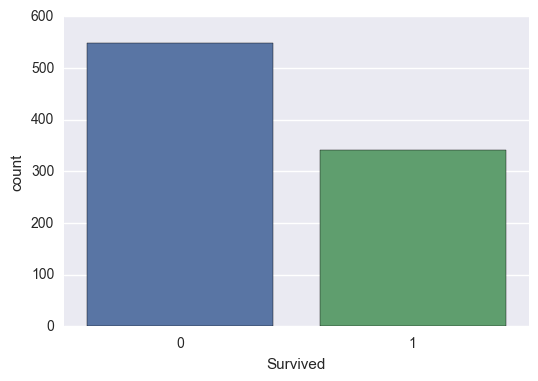

In [19]:
sns.countplot(x="Survived", data=titanic_data)

This bar chat shows comparison of numbers of suvived passengers and not survived passengers.

### Research Question 2  (Is there any differences between men and women on survival chance?)

In [20]:
titanic_data.groupby(['Sex']).count()['PassengerId']

Sex
female    314
male      577
Name: PassengerId, dtype: int64

The number of female passengers is 314 and the number of male passengers is 577.

In [21]:
Sex_effect = titanic_data.groupby(['Survived','Sex']).count()['PassengerId'] / len(titanic_data)
print Sex_effect

Survived  Sex   
0         female    0.090909
          male      0.525253
1         female    0.261504
          male      0.122334
Name: PassengerId, dtype: float64


Of all the passengers, 9.1% were none-survived female, 52.5% were none-survived male, 26.2% were suvived female and 12.2% were survived male.

In [22]:
male_survive_count = ((titanic_data['Survived']==1)&(titanic_data['Sex']=='male')).sum()
print 'male_survive_count:'
print male_survive_count
male_number = (titanic_data['Sex']=='male').sum()
print 'male_number:'
print male_number
male_survive_ratio = np.divide(float(male_survive_count),float(male_number))
print 'male_survive_ratio:'
print male_survive_ratio

male_survive_count:
109
male_number:
577
male_survive_ratio:
0.188908145581


 109 of 577 male were survived and the percentage is 18.9%.

In [23]:
female_survive_count = ((titanic_data['Survived']==1)&(titanic_data['Sex']=='female')).sum()
print 'female_survive_count:'
print female_survive_count
female_number = (titanic_data['Sex']=='female').sum()
print 'female_number:'
print female_number
female_survive_ratio = np.divide(float(female_survive_count),float(female_number))
print 'female_survive_ratio:'
print female_survive_ratio

female_survive_count:
233
female_number:
314
female_survive_ratio:
0.742038216561


233 of 314 female were survived and the precentage is 74.2%

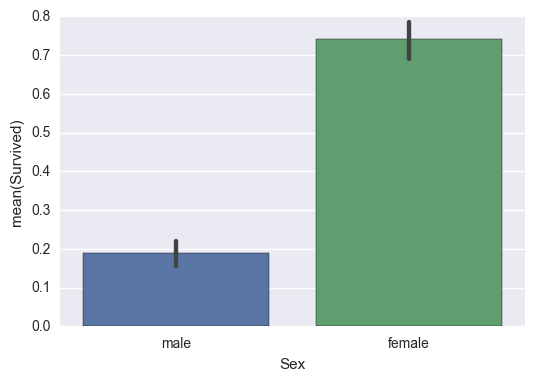

In [24]:
sns.barplot(x="Sex", y="Survived",  data=titanic_data);

The bar chat shows clearly that female has extremely higher survival rate than male. 

### Research Question 3 (Is there obvious difference of passengers' age between survived group and none-survived group?)

In [25]:
Age_effect.groupby('Survived').describe()

Age
Survived                  
0        count  424.000000
         mean    30.626179
         std     14.172110
         min      1.000000
         25%     21.000000
         50%     28.000000
         75%     39.000000
         max     74.000000
1        count  290.000000
         mean    28.343690
         std     14.950952
         min      0.420000
         25%     19.000000
         50%     28.000000
         75%     36.000000
         max     80.000000

Check the overall information of passengers' age in none-survived group and survived group, including the count, mean, std ect.
<br>
It shows that there is 424 age records in none-survived group and the age ranges from 1.0 to 74.0 with mean of 30.6. However there is 290 age records in survived group and the age ranges from 0.42 to 80.0 with mean of 28.3.

In [26]:
Age_effect_df = Age_effect.groupby('Survived').agg(['mean','var','count','std'])
print Age_effect_df

                Age                             
               mean         var count        std
Survived                                        
0         30.626179  200.848698   424  14.172110
1         28.343690  223.530965   290  14.950952


We creat a dataframe containing information of mean, variance, count and stand deviation of two groups. 

In [27]:
def testzvalue(df):
    diff = df.iloc[0,0]-df.iloc[1,0]
    SE = np.sqrt(df.iloc[0,1]/df.iloc[0,2]+df.iloc[1,1]/df.iloc[1,2])
    z = diff/SE
    pvalue = 2*norm.cdf(-np.abs(z))
    return (z, pvalue)

We make a function to calculate z value and p value (two-tailed) using the dataframe we just created.

In [28]:
testzvalue(Age_effect_df)

(2.0460301043939704, 0.040753408892650195)

Calculate z value and p value of two groups. 
<br>
It shows z value is 2.05 and p value is 0.04. Since p value is between 0.01 and 0.05, it is sure the ages of two groups are different, however the difference is not very obvious.

Survived
0    [[Axes(0.125,0.125;0.775x0.775)]]
1    [[Axes(0.125,0.125;0.775x0.775)]]
dtype: object

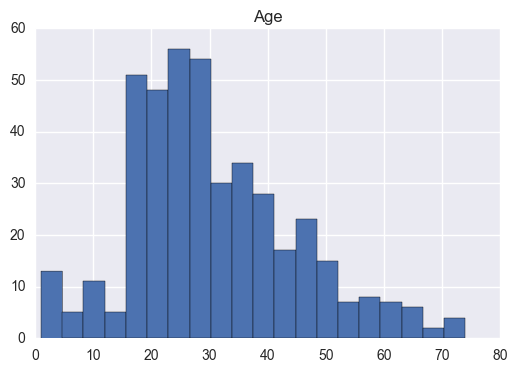

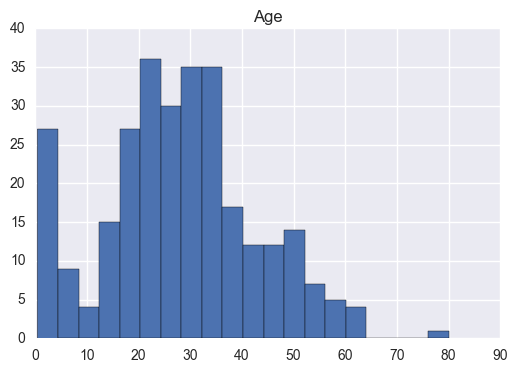

In [29]:
Age_effect.groupby('Survived').hist(bins=20)

We can check the distribution of ages in two groups from the histogram. The distribution graphs are coincident with the result of p value which shows no obvious difference between two groups.

### Research Question 4 (Is there obvious difference of passengers' Fare between survived group and none-survived group?)

In [30]:
Fare_effect = titanic_data[['Survived', 'Fare']].copy()
print len(Fare_effect)
Fare_effect.head(10)

891


,Survived,Fare
0,0,7.2500
1,1,71.2833
2,1,7.9250
3,1,53.1000
4,0,8.0500
5,0,8.4583
6,0,51.8625
7,0,21.0750
8,1,11.1333
9,1,30.0708


Copy columns 'Survived' and 'Fare' to a new dataframe 'Fare_effect'.

In [31]:
Fare_effect.groupby('Survived').describe()

Fare
Survived                  
0        count  549.000000
         mean    22.117887
         std     31.388207
         min      0.000000
         25%      7.854200
         50%     10.500000
         75%     26.000000
         max    263.000000
1        count  342.000000
         mean    48.395408
         std     66.596998
         min      0.000000
         25%     12.475000
         50%     26.000000
         75%     57.000000
         max    512.329200

Check the overall information of passengers' fare in none-survived group and survived group, including the count, mean, std ect.
<br>
It shows that there is 549 fare records in none-survived group and the fare ranges from 0 to 263 with mean of 22.12. However there is 342 fare records in survived group and the fare ranges from 0 to 512.3 with mean of 48.40.

In [32]:
Fare_effect_df = Fare_effect.groupby('Survived').agg(['mean','var','count','std'])
print Fare_effect_df

               Fare                              
               mean          var count        std
Survived                                         
0         22.117887   985.219509   549  31.388207
1         48.395408  4435.160158   342  66.596998


We creat a dataframe containing information of mean, variance, count and stand deviation of two groups. 

In [33]:
testzvalue(Fare_effect_df)

(-6.8390992590852573, 7.9692656344775943e-12)

Apply the function to calculate z value and p value. 
<br>
It shows that the fare between two groups has z value of -6.84 and p value of 7.97e-12. 
Since the p value is far less than 0.01, it is sure that fare between two groups are obviously different. 

Survived
0    [[Axes(0.125,0.125;0.775x0.775)]]
1    [[Axes(0.125,0.125;0.775x0.775)]]
dtype: object

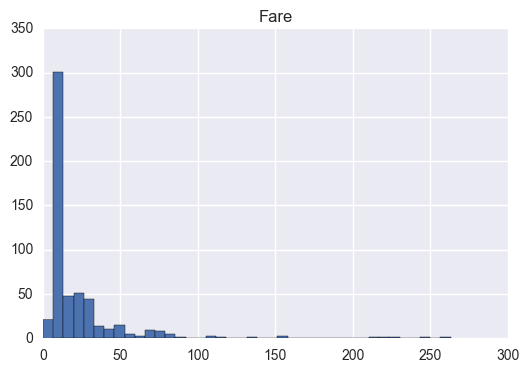

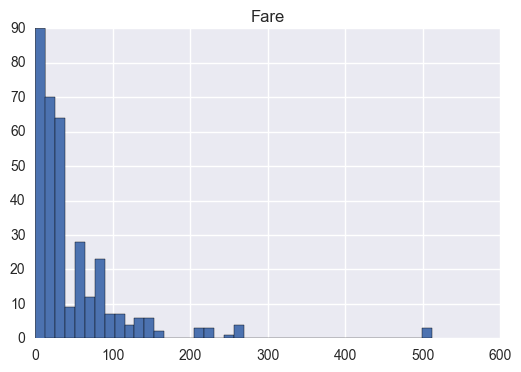

In [34]:
Fare_effect.groupby('Survived').hist(bins=40)

We can check the distribution of fare in two groups from the histogram. The distribution graphs are coincident with the result of p value which shows obvious difference between two groups as the distribution of none-survived group is focused on 5-10 while the distribution of survived group is more spread out with more large fares.

<a id='conclusions'></a>
## Conclusions

* In this project, we explored titanic data amd investigated passengers' survival information. Through exploration of data, we found that 549 passengers were survived while 342 passengers were not survived. Of all passengers, 38.4% were survived while 61.6% were not survived. So survival rate is much less than none-survival rate. 
<br>
* On the other hand, we tried to find out some other factors which may affect passengers' survival chance. Here we focused on passengers' sex, age and fare, and examined the differences of these factors between survival group and none-survival group. 
<br>
* * From sex perspective, The number of female passengers is 314 and the number of male passengers is 577. 109 of 577 male were survived and the percentage is 18.9%. 233 of 314 female were survived and the precentage is 74.2%. This indicate that female has extremely higher survival chance than male.
<br>
* * Passengers' age was also checked. There is 424 age records in none-survived group and the age ranges from 1.0 to 74.0 with mean of 30.6. However there is 290 age records in survived group and the age ranges from 0.42 to 80.0 with mean of 28.3. We calculated  z value and p value (two-tailed) for suvival group and none-survival group.  z value is 2.05 and p value is 0.04. Since p value is between 0.01 and 0.05, it is sure the ages of two groups are different, however the difference is not very obvious.
<br>
* * We we looked into fare of two groups of passengers, we found there is 549 fare records in none-survived group and the fare ranges from 0 to 263 with mean of 22.12. However there is 342 fare records in survived group and the fare ranges from 0 to 512.3 with mean of 48.40. Through calculation, between two groups, z value is -6.84 and p value (two-tailed) is 7.97e-12. Since p value is much less than 0.01, the fare value is obviously different between survial group and none-survival group. 

Overall passengers have 38.4% chance to survive. However, if we check some other factors, we may find that female passengers have more survival chance than male passengers; passengers who paid higher fare have more survival chance than who paid lower fare. The age of survival group and none-survival group has not too much difference, which means passengers' age doesn't have too much correlation of survival chance. 

As we don't have control group, we can't investigate the causation of those factors to survival chance. Our investigation are only limited to correlations of those factors to survival chance.

#### Reference
https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/
<br>
http://www.ritchieng.com/programming-languages/
<br>
https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/
<br>
https://stackoverflow.com/questions/34682828/pandas-extracting-specific-selected-columns-from-a-dataframe-to-new-dataframe
<br>
https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
<br>
http://dept.stat.lsa.umich.edu/~kshedden/Python-Workshop/stats_calculations.html
<br>
http://seaborn.pydata.org/tutorial/categorical.html